<a href="https://colab.research.google.com/github/9-coding/PyTorch/blob/main/13-1_linear_regression_without_autograd_simple_ver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
1. 데이터 정의 or 불러오기
2. linear 함수와 손실함수 선언하기
3. paramters 초기화하기
4. 미분 함수 정의하기
5. training loop 선언<br>
  : epoch만큼 순회하며
  - prediction하고 loss 계산
  - gradient 계산
  - update parameters
6. 결과 확인

In [179]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, Math, Latex

In [180]:
for c in [torch, np]:
  print(c.__version__)

2.2.1+cu121
1.25.2


y_noise로 학습해야 함

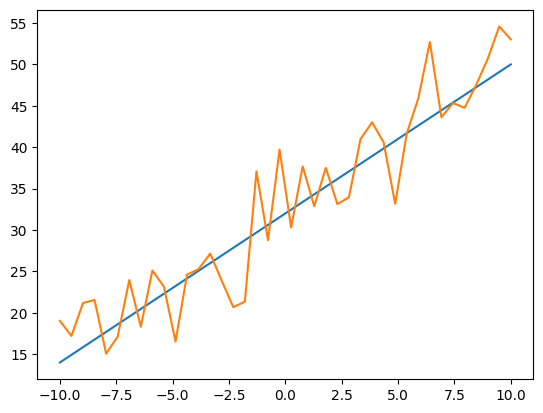

In [181]:
x = np.linspace(-10, 10, 40)
y_ideal = 1.8*x + 32
y_noise = y_ideal + 4 * np.random.randn((40))

plt.plot(x, y_ideal, x, y_noise)


In [182]:
x = torch.tensor(x).float()
y = torch.tensor(y_noise).float()

In [183]:
def linear(x, w, b):
  y = w*x + b
  return y

def mse(pred, label):
  mse = ((pred - label)**2).mean()
  return mse

In [184]:
w = torch.ones(())
b = torch.zeros(())
w, b

(tensor(1.), tensor(0.))

In [185]:
pred = linear(x, w, b)
pred

tensor([-10.0000,  -9.4872,  -8.9744,  -8.4615,  -7.9487,  -7.4359,  -6.9231,
         -6.4103,  -5.8974,  -5.3846,  -4.8718,  -4.3590,  -3.8462,  -3.3333,
         -2.8205,  -2.3077,  -1.7949,  -1.2821,  -0.7692,  -0.2564,   0.2564,
          0.7692,   1.2821,   1.7949,   2.3077,   2.8205,   3.3333,   3.8462,
          4.3590,   4.8718,   5.3846,   5.8974,   6.4103,   6.9231,   7.4359,
          7.9487,   8.4615,   8.9744,   9.4872,  10.0000])

In [186]:
print(mse(pred, pred))
print(mse(pred+1, pred))

tensor(0.)
tensor(1.)


In [187]:
def gd_w(x, w, b, delta):
  gd = (mse(linear(x, w+delta, b), y_noise) - mse(linear(x, w-delta, b), y_noise)) / 2 * delta
  return gd

def gd_b(x, w, b, delta):
  gd = (mse(linear(x, w, b+delta), y_noise) - mse(linear(x, w, b-delta), y_noise)) / 2 * delta
  return gd

In [188]:
loss = mse(pred, y_noise)
loss

tensor(1112.1860, dtype=torch.float64)

$L = MSE() = (pred - y)^2$<br>
$f = wx +b$

$\cfrac{\partial L}{\partial w} = \cfrac{\partial L}{\partial f}\cfrac{\partial f}{\partial w}$

In [189]:
# Loss를 f에 대해 편미분
def dL_df(pred, y):
  ret_v = 2. * (pred-y)
  return ret_v

# f를 w에 대해 편미분
def df_dw(x, w, b):
  return x

# f를 b에 대해 편미분
def df_db(w, x, b):
  return 1.

In [201]:
def get_grad(x, y, pred, w, b):
  dLdf = dL_df(pred, y)
  dLdw = dLdf * df_dw(x, w, b)
  dLdb = dLdf * df_db(x, w, b)
  return torch.stack([dLdw.mean(), dLdb.mean()])

In [203]:
def training(x, y, w_, b_, n_epoch, lr):
  w, b = w_, b_
  for epoch in range(n_epoch):
    pred = linear(x, w, b)
    loss = mse(pred, y)

    grad = get_grad(x, y, pred, w, b)

    w = w - lr*grad[0]
    b = b - lr*grad[1]

    if epoch % 500 == 0:
      print(f"Epoch {epoch} Loss: {loss}")
  return w, b

In [204]:
w_n, b_n = training(x, y,
                torch.ones(()),
                torch.zeros(()),
                3000,
                1e-3)

Epoch 0 Loss: 1112.18603515625
Epoch 500 Loss: 161.53195190429688
Epoch 1000 Loss: 36.32762145996094
Epoch 1500 Loss: 19.416988372802734
Epoch 2000 Loss: 17.132959365844727
Epoch 2500 Loss: 16.82447052001953
tensor(1.8216)


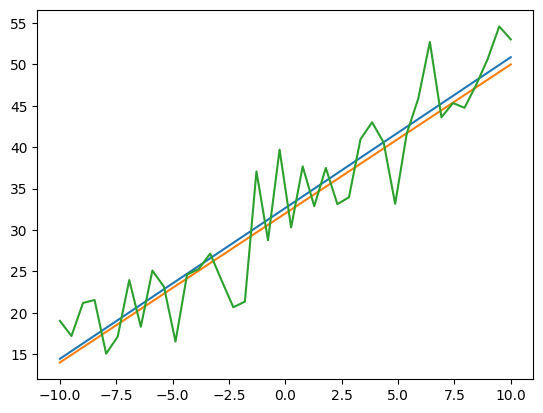

In [206]:
pred = linear(x, w_n, b_n)

plt.plot(x, pred, x, y_ideal, x, y_noise)